<a href="https://colab.research.google.com/github/brunobro/selecaodearvorededecisao/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Seleção de árvore de decisão do Ensemble Random Forest**

Neste tutorial aprenderemos como selecionar a Árvore de Decisão mais simples a partir daquelas obtidas pelo emprego do algorítimo Random Forest.

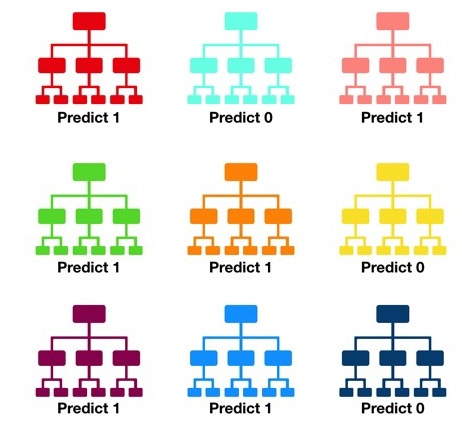

**Porque utilizar Árvores de Decisão no Aprendizado de Máquina?**

**Vantagens das Árvores de Decisão**

1.   Requerem menos esforço para a preparação dos dados durante o pré-processamento: 
  * Não requer normalização de dados
  * Não exige dimensionamento de dados.
  * Trabalha tanto em dados caregóricos quanto numéricos.
2.   Valores ausentes não afetam o processo de construção do modelo de forma considerável.
3.   Os modelos são muito intuitivos.
4.   Os algoritimos possibilitam seleção de atributos (features).

**Desvantagens das Árvores de Decisão**

1.   Pequenas mudanças nos dados podem causar uma grande mudança na estrutura do modelo. Portanto, está sujeita a ruídos.
2.   Os modelos são propensos a superajustar (overfitting) aos dados. Isso acarreta em alta variância reduzindo a precisão.
3. Inadequada para base de dados muito grandes, pois tenderá a criar Árvores muito complexas, acarretando no overfitting.

**Random Forest (Florestas Aleatórias)**

Para driblar as desvantagens das Árvores de Decisão, foi proposto o algoritmo Random Forest. Basicamente, ele consiste em gerar vários modelos, evitando assim o overfitting. (Link para o artigo inicial: https://link.springer.com/article/10.1023/A:1010933404324)

*Entretanto, ao gerar vários modelos, como podemos continuar tendo em mãos o poder explicativo das árvores de decisão.*

Uma maneira de fazer isto é selecionar os modelos gerados. Mas não devemos selecionar qualquer modelo, pois estamos vizando a explicação do modelo aprendido. Portanto, devemos escolher o modelo mais simples.

In [1]:
import numpy as np

'''
Módulos para induzir os modelos de Árvores de Decisão
'''
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

'''
Módulos para gerar um gráfico de um modelo
'''
from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import display, SVG

In [2]:
'''
Induz um modelo Random Forest com 100 Árvores de Decisão, faz a predição e mostra a acurácia
'''
iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=0)

clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Acc: %.4f' %accuracy_score(y_test, y_pred))

'''
Obtém os modelos induzidos
'''
models = clf.estimators_

Acc: 0.9778


In [3]:
'''
Exibe uma árvore a partir de um modelo e sua acurácia
'''
def show_tree(model, X, y):
  graph_data = export_graphviz(
    model, 
    feature_names=iris.feature_names, 
    class_names=iris.target_names, 
    filled=True, 
    rounded=True)
  
  y_pred = model.predict(X)
  print('Acc: %.4f' %accuracy_score(y, y_pred))

  graph = Source(graph_data)
  return SVG(graph.pipe(format='svg'))


Acc: 0.9867


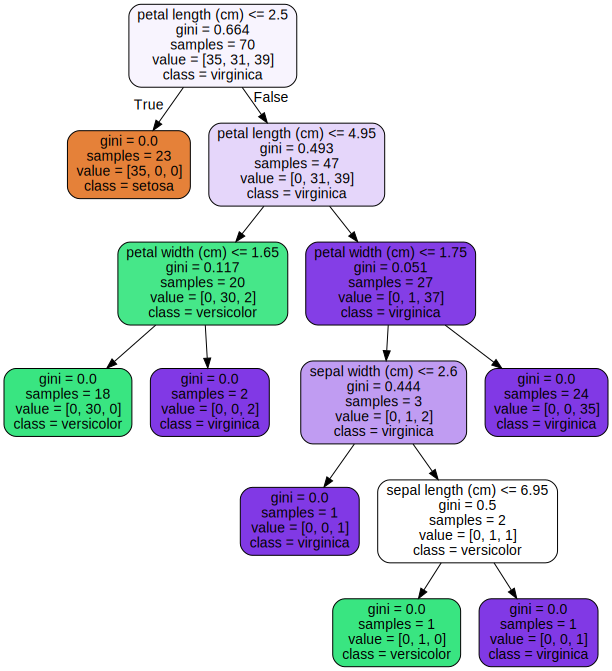

In [13]:
'''
Exibe um modelo qualquer
'''
show_tree(models[50], X_test, y_test)

Acc: 0.8889


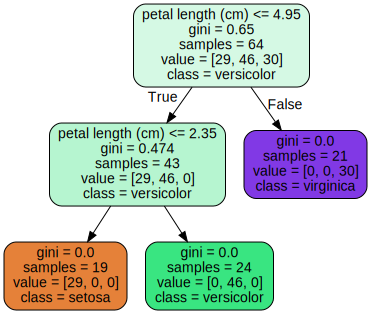

In [16]:
'''
Obtém o modelo com menor número de nós (a árvore mais simples)
'''
max_nodes      = 1E100
model_selected = None

for model in models:
  M = model.tree_.node_count
  if M < max_nodes:
    max_nodes = M
    model_selected = model

'''
Exibe o menor modelo
'''
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=3000)
show_tree(model_selected, X_test, y_test)